# Analysing the Edinburgh Fringe Festival Jokes

**This is the ipython notebook for the blog post: [Python, natural language processing and predicting funny](http://vknight.org/unpeudemath/code/2015/06/14/natural-language-and-predicting-funny/)**.

Here are the libraries we are going to need:

In [3]:
import pandas  # To handle our data nicely
import nltk  # For all the clever stuff

## Loading and tidying the data

In [4]:
df = pandas.read_json('jokes.json') # Loading the json file
df.head()

Author  Rank                                           Raw_joke  \
0       Tim Vine     1  I've decided to sell my Hoover... well it was ...   
1   Masai Graham     2  I've written a joke about a fat badger but I c...   
10     Rob Auton     1  I heard a rumour that Cadbury is bringing out ...   
11    Alex Horne     2  I used to work in a shoe-recycling shop. It wa...   
12   Alfie Moore     3  I'm in a same-sex marriage... the sex is alway...   

    Year  
0   2014  
1   2014  
10  2013  
11  2013  
12  2013

In [5]:
df.tail()

Author  Rank                                           Raw_joke  \
59  Simon Brodkin    10  I started so many fights at my school - I had ...   
6   Scott Capurro     7  Scotland had oil but it's running out thanks t...   
7      Jason Cook     8  I've been married for 10 years I haven't made ...   
8   Felicity Ward     9  This show is about perception and perspective....   
9    Masai Graham     2  I've written a joke about a fat badger but I c...   

    Year  
59  2009  
6   2014  
7   2014  
8   2014  
9   2013

Getting rid of the common word and tokenising the jokes

In [6]:
# nltk.download()  # Only do this once: needed to download the `stopwords` corpus

In [7]:
commonwords = [e.upper() for e in set(nltk.corpus.stopwords.words('english'))] # <- Need to download the corpus: import nltk; nltk.download()
commonwords.extend(['M', 'VE'])
tokenizer = nltk.tokenize.RegexpTokenizer(r'\w+')  # To be able to strip out unwanted things in strings
string_to_list = lambda x: [el.upper() for el in tokenizer.tokenize(x) if el.upper() not in commonwords]
df['Joke'] = df['Raw_joke'].apply(string_to_list)

In [8]:
df.head()

Author  Rank                                           Raw_joke  \
0       Tim Vine     1  I've decided to sell my Hoover... well it was ...   
1   Masai Graham     2  I've written a joke about a fat badger but I c...   
10     Rob Auton     1  I heard a rumour that Cadbury is bringing out ...   
11    Alex Horne     2  I used to work in a shoe-recycling shop. It wa...   
12   Alfie Moore     3  I'm in a same-sex marriage... the sex is alway...   

    Year                                               Joke  
0   2014    [DECIDED, SELL, HOOVER, WELL, COLLECTING, DUST]  
1   2014     [WRITTEN, JOKE, FAT, BADGER, COULDN, FIT, SET]  
10  2013  [HEARD, RUMOUR, CADBURY, BRINGING, ORIENTAL, C...  
11  2013  [USED, WORK, SHOE, RECYCLING, SHOP, SOLE, DEST...  
12  2013                       [SEX, MARRIAGE, SEX, ALWAYS]

## Training our classifier

**From here on in we use the jokes up until 2013 as the training set.**

We start by getting the entire set of words in all the jokes from the training set.

In [9]:
df['Year'] = df['Year'].apply(int)

def get_all_words(dataframe):
    """
    A function that gets all the words from the Joke column in a given dataframe
    """
    all_words = []
    for jk in dataframe['Joke']:
        all_words.extend(jk)
    return all_words

all_words = get_all_words(df[df['Year'] <= 2013])
all_words[:10]  # The first ten words in our training data set

[u'HEARD',
 u'RUMOUR',
 u'CADBURY',
 u'BRINGING',
 u'ORIENTAL',
 u'CHOCOLATE',
 u'BAR',
 u'COULD',
 u'CHINESE',
 u'WISPA']

Creating a function to extract features from a given joke

In [10]:
def extract_features(joke, all_words):
    words = set(joke)
    features = {}
    for word in words:
        features['contains(%s)' % word] = (word in all_words)
    return features

In [11]:
df['Features'] = df['Joke'].apply(lambda x:extract_features(x, get_all_words(df[df['Year'] <= 2013])))
df.head()

Author  Rank                                           Raw_joke  \
0       Tim Vine     1  I've decided to sell my Hoover... well it was ...   
1   Masai Graham     2  I've written a joke about a fat badger but I c...   
10     Rob Auton     1  I heard a rumour that Cadbury is bringing out ...   
11    Alex Horne     2  I used to work in a shoe-recycling shop. It wa...   
12   Alfie Moore     3  I'm in a same-sex marriage... the sex is alway...   

    Year                                               Joke  \
0   2014    [DECIDED, SELL, HOOVER, WELL, COLLECTING, DUST]   
1   2014     [WRITTEN, JOKE, FAT, BADGER, COULDN, FIT, SET]   
10  2013  [HEARD, RUMOUR, CADBURY, BRINGING, ORIENTAL, C...   
11  2013  [USED, WORK, SHOE, RECYCLING, SHOP, SOLE, DEST...   
12  2013                       [SEX, MARRIAGE, SEX, ALWAYS]   

                                             Features  
0   {u'contains(DUST)': False, u'contains(COLLECTI...  
1   {u'contains(SET)': True, u'contains(WRITTEN)':...  
10  {u'contains(ORIENTAL)': True, u'contains(CHOCO...  
11  {u'contains(DESTROYING)': True, u'contains(SOL...  
12  {u'contains(MARRIAGE)': True, u'contains(SEX)'...

Labelling our jokes depending on what will be deemed as funny

In [12]:
funny_threshold = 5
df['Rank'] = df['Rank'].apply(int)
df['Funny'] = df['Rank'] <= funny_threshold
df.head(10)

Author  Rank  \
0            Tim Vine     1   
1        Masai Graham     2   
10          Rob Auton     1   
11         Alex Horne     2   
12        Alfie Moore     3   
13           Tim Vine     4   
14       Gary Delaney     5   
15          Phil Wang     6   
16  Marcus Brigstocke     7   
17      Liam Williams     8   

                                             Raw_joke  Year  \
0   I've decided to sell my Hoover... well it was ...  2014   
1   I've written a joke about a fat badger but I c...  2014   
10  I heard a rumour that Cadbury is bringing out ...  2013   
11  I used to work in a shoe-recycling shop. It wa...  2013   
12  I'm in a same-sex marriage... the sex is alway...  2013   
13  My friend told me he was going to a fancy dres...  2013   
14  I can give you the cause of anaphylactic shock...  2013   
15  The Pope is a lot like Doctor Who. He never di...  2013   
16  You know you are fat when you hug a child and ...  2013   
17                  The universe implodes. No matter.  2013   

                                                 Joke  \
0     [DECIDED, SELL, HOOVER, WELL, COLLECTING, DUST]   
1      [WRITTEN, JOKE, FAT, BADGER, COULDN, FIT, SET]   
10  [HEARD, RUMOUR, CADBURY, BRINGING, ORIENTAL, C...   
11  [USED, WORK, SHOE, RECYCLING, SHOP, SOLE, DEST...   
12                       [SEX, MARRIAGE, SEX, ALWAYS]   
13  [FRIEND, TOLD, GOING, FANCY, DRESS, PARTY, ITA...   
14       [GIVE, CAUSE, ANAPHYLACTIC, SHOCK, NUTSHELL]   
15  [POPE, LOT, LIKE, DOCTOR, NEVER, DIES, KEEPS, ...   
16                [KNOW, FAT, HUG, CHILD, GETS, LOST]   
17                       [UNIVERSE, IMPLODES, MATTER]   

                                             Features  Funny  
0   {u'contains(DUST)': False, u'contains(COLLECTI...   True  
1   {u'contains(SET)': True, u'contains(WRITTEN)':...   True  
10  {u'contains(ORIENTAL)': True, u'contains(CHOCO...   True  
11  {u'contains(DESTROYING)': True, u'contains(SOL...   True  
12  {u'contains(MARRIAGE)': True, u'contains(SEX)'...   True  
13  {u'contains(GOING)': True, u'contains(PARTY)':...   True  
14  {u'contains(ANAPHYLACTIC)': True, u'contains(N...   True  
15  {u'contains(REPLACED)': True, u'contains(NEVER...  False  
16  {u'contains(LOST)': True, u'contains(CHILD)': ...  False  
17  {u'contains(MATTER)': True, u'contains(IMPLODE...  False

Creating a labeled feature

In [13]:
df['Labeled_Feature'] = zip(df['Features'],df['Funny'])
df.head()

Author  Rank                                           Raw_joke  \
0       Tim Vine     1  I've decided to sell my Hoover... well it was ...   
1   Masai Graham     2  I've written a joke about a fat badger but I c...   
10     Rob Auton     1  I heard a rumour that Cadbury is bringing out ...   
11    Alex Horne     2  I used to work in a shoe-recycling shop. It wa...   
12   Alfie Moore     3  I'm in a same-sex marriage... the sex is alway...   

    Year                                               Joke  \
0   2014    [DECIDED, SELL, HOOVER, WELL, COLLECTING, DUST]   
1   2014     [WRITTEN, JOKE, FAT, BADGER, COULDN, FIT, SET]   
10  2013  [HEARD, RUMOUR, CADBURY, BRINGING, ORIENTAL, C...   
11  2013  [USED, WORK, SHOE, RECYCLING, SHOP, SOLE, DEST...   
12  2013                       [SEX, MARRIAGE, SEX, ALWAYS]   

                                             Features Funny  \
0   {u'contains(DUST)': False, u'contains(COLLECTI...  True   
1   {u'contains(SET)': True, u'contains(WRITTEN)':...  True   
10  {u'contains(ORIENTAL)': True, u'contains(CHOCO...  True   
11  {u'contains(DESTROYING)': True, u'contains(SOL...  True   
12  {u'contains(MARRIAGE)': True, u'contains(SEX)'...  True   

                                      Labeled_Feature  
0   ({u'contains(DUST)': False, u'contains(COLLECT...  
1   ({u'contains(SET)': True, u'contains(WRITTEN)'...  
10  ({u'contains(ORIENTAL)': True, u'contains(CHOC...  
11  ({u'contains(DESTROYING)': True, u'contains(SO...  
12  ({u'contains(MARRIAGE)': True, u'contains(SEX)...

Creating our classifier

In [14]:
classifier = nltk.NaiveBayesClassifier.train(df[df['Year'] <= 2013]['Labeled_Feature'])

In [18]:
classifier.show_most_informative_features(10)

Most Informative Features
           contains(GOT) = True            False : True   =      2.4 : 1.0
          contains(KNOW) = True             True : False  =      1.7 : 1.0
        contains(PEOPLE) = True            False : True   =      1.7 : 1.0
           contains(SEX) = True            False : True   =      1.7 : 1.0
         contains(NEVER) = True            False : True   =      1.7 : 1.0
            contains(RE) = True             True : False  =      1.6 : 1.0
        contains(FRIEND) = True             True : False  =      1.6 : 1.0
           contains(SAY) = True             True : False  =      1.6 : 1.0
        contains(BOUGHT) = True             True : False  =      1.6 : 1.0
           contains(ONE) = True             True : False  =      1.5 : 1.0


In [22]:
joke = 'Why was 10 afraid of 7? Because 7 8 9'
classifier.classify(extract_features(string_to_list(joke), get_all_words(df[df['Year'] <= 2013])))

True

In [23]:
joke = 'Your mother is ...'
classifier.classify(extract_features(string_to_list(joke), get_all_words(df[df['Year'] <= 2013])))

False

The real test comes from applying our classifier to [this year's jokes](http://www.bbc.co.uk/news/uk-scotland-edinburgh-east-fife-28838287)

In [798]:
df['Prediction'] = df['Features'].apply(classifier.classify)
df[df['Year'] == 2014][['Raw_joke','Funny','Prediction']]

Raw_joke  Funny Prediction
0  I've decided to sell my Hoover... well it was ...   True      False
1  I've written a joke about a fat badger but I c...   True       True
2  Always leave them wanting more my uncle used t...   True       True
3  I was given some Sudoku toilet paper. It didn'...   True      False
4  I wanted to do a show about feminism. But my h...   True      False
5  Money can't buy you happiness? Well check this...  False      False
6  Scotland had oil but it's running out thanks t...  False       True
7  I've been married for 10 years I haven't made ...  False       True
8  This show is about perception and perspective....  False       True

In [799]:
sum(df[df['Year'] == 2014]['Prediction'] == df[df['Year'] == 2014]['Funny']) / float(len(df[df['Year'] == 2014]))

0.33333333333333331

## Wrapping all of the above in a function to see if we can identify how our classifier performs based on a funniness threshold

In [800]:
def accuracy(funny_threshold):
    """
    A function to return the accuracy of our predictor
    """
    df['Funny'] = df['Rank'] <= funny_threshold  # Changing the threshold
    df['Labeled_Feature'] = zip(df['Features'], df['Funny'])  # Re create labeled features
    classifier = nltk.NaiveBayesClassifier.train(df[df['Year'] <= 2013]['Labeled_Feature'])  # Train classifier
    df['Prediction'] = df['Features'].apply(classifier.classify)  # Apply classifier
    return sum(df[df['Year'] == 2014]['Prediction'] == df[df['Year'] == 2014]['Funny']) / float(len(df[df['Year'] == 2014]))

In [801]:
import seaborn as sns  # Making our plots look nicer easier (seaborn does a lot more: check it out)
import matplotlib.pyplot as plt  # Plots
%matplotlib inline

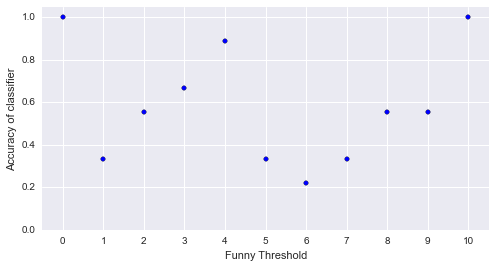

In [802]:
x = range(0, 11)
y = [accuracy(n) for n in x]

sns.set_style("darkgrid")
sns.set_context(rc={"figure.figsize": (8, 4)})

fig = plt.figure()
plt.scatter(x, y)
plt.xlabel('Funny Threshold')
plt.ylabel('Accuracy of classifier')
sns.plt.ylim(0,1.05)
sns.plt.xlim(min(x) - .5, max(x) + .5)
plt.xticks(x)
sns.despine()

## Wrapping everything in another function to see the effect of the testing data set

We used previous years to train for this year. Here we will just use random samples of a variety of size of the data to train.

In [803]:
import random

In [804]:
def accuracy(ratio_of_data=.8, funny_threshold=5):
    """
    A function to return the accuracy of our predictor based on 
    the percentage of rows and threshold of funniness used as a training set
    """
    n = max(1, min(int(ratio_of_data * len(df)), len(df) - 1))  # Makes sure we don't have a stupid number of rows
    df['Funny'] = df['Rank'] <= funny_threshold  # Threshold funniness

    training_rows = random.sample(df.index, n)  # Identify the rows used for the training
    all_words = get_all_words(df.ix[training_rows])  # Identify all the words
    df['Features'] = df['Joke'].apply(lambda x:extract_features(x, all_words))  # Extract the features
    df['Labeled_Feature'] = zip(df['Features'],df['Funny'])  # Re create labeled features
    
    classifier = nltk.NaiveBayesClassifier.train(df.ix[training_rows]['Labeled_Feature'])  # Train classifier
    df['Prediction'] = df['Features'].apply(classifier.classify)  # Apply classifier
    return sum(df.drop(training_rows)['Prediction'] == df.drop(training_rows)['Funny']) / float((len(df) - n))

Here is a plot of the accuracy for varying ratio.

In [805]:
def ratio_experiment_data(funny_threshold=5, number_of_steps=10, number_of_repetitions=20):
    """
    Use `funny_threshold` as the funny threshold.
    Repeat all this for a granularity given by `number_of_steps` and repeating each experiment `number_of_repetitions` times.
    """
    steps = [x / float(number_of_steps) for x in range(number_of_steps)]
    return [[accuracy(ratio_of_data=x, funny_threshold=funny_threshold) for x in steps] 
            for k in range(number_of_repetitions)], steps

In [811]:
def plot(funny_threshold=5, number_of_steps=10, number_of_repetitions=20, color='blue'):
    data, steps = random_experiment_data(funny_threshold=funny_threshold, 
                                         number_of_steps=number_of_steps, 
                                         number_of_repetitions=number_of_repetitions)

    fig = plt.figure()
    sns.tsplot(data, steps, color=color)
    plt.xlabel('Ratio of data used for training (%s repetitions)' % number_of_repetitions)
    plt.ylabel('Accuracy')
    sns.plt.ylim(0,1)
    plt.title('Accuracy with funny threshold: %s ' % funny_threshold)
    plt.show()
    return data, steps

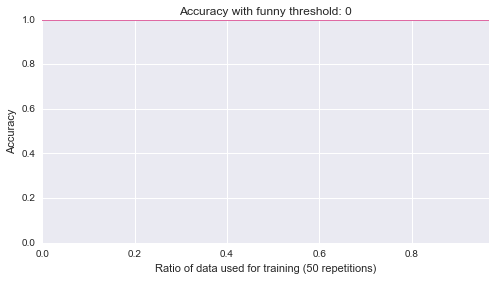

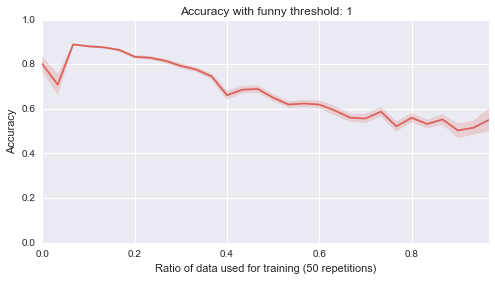

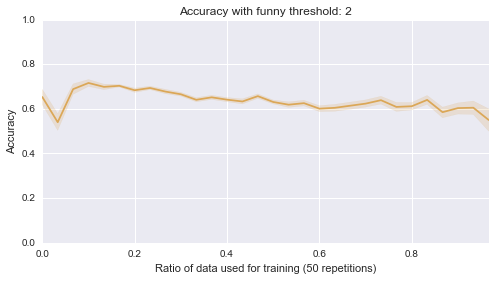

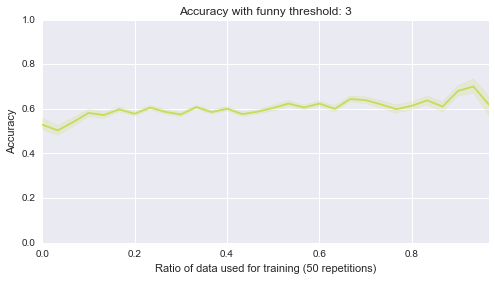

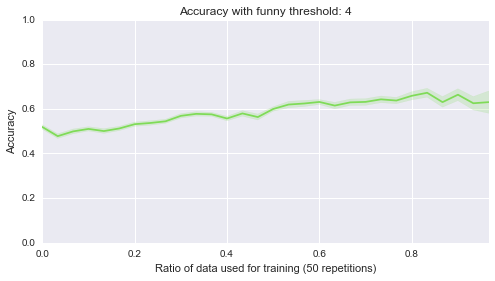

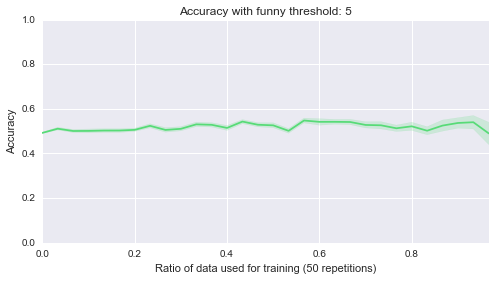

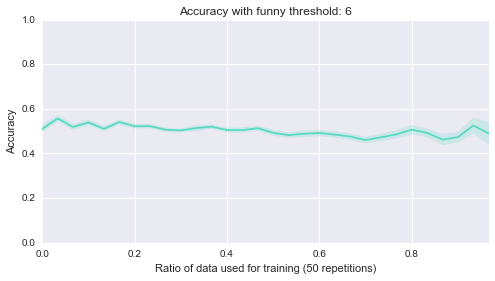

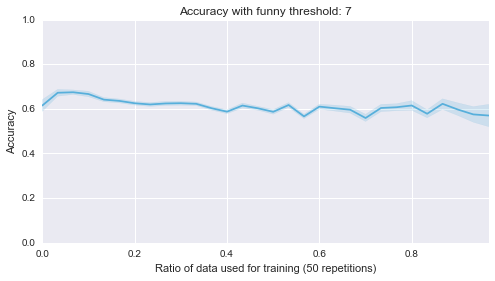

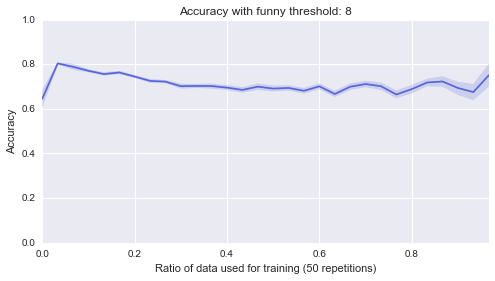

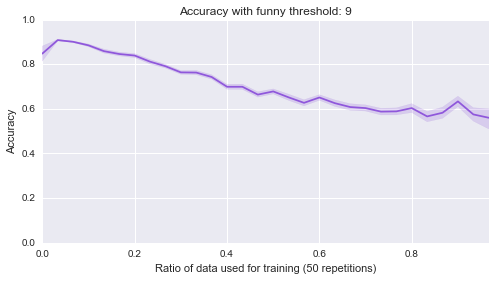

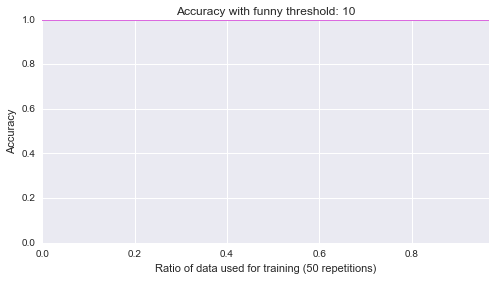

In [812]:
steps = 30
repetitions = 50
stacked_data = []
clrs = sns.color_palette("hls", 11)
for n in range(11):
    stacked_data.append(plot(funny_threshold=n, number_of_steps=steps, number_of_repetitions=repetitions, color=clrs[n - 1]))

Here are all the above on a single plot (not terrible helpful).

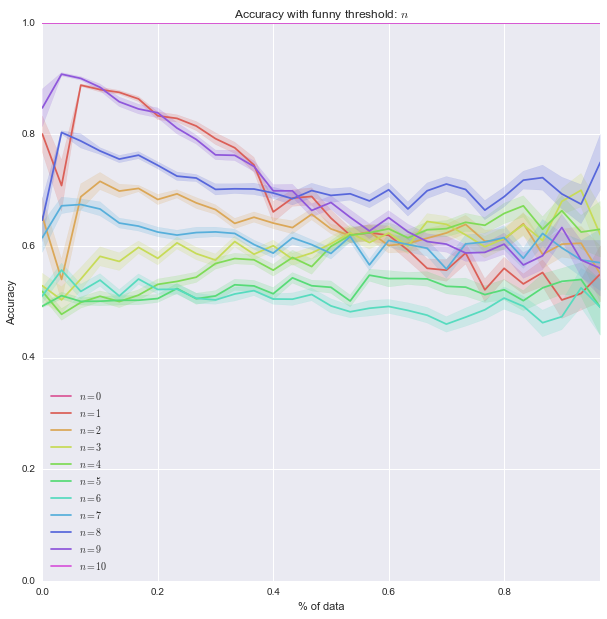

In [815]:
sns.set_context(rc={"figure.figsize": (10, 10)})
plt.figure()
for n in range(11):
    sns.tsplot(*stacked_data[n], color=clrs[n - 1], condition="$n=%s$" % (n))
    plt.xlabel('% of data')
    plt.ylabel('Accuracy')
    sns.plt.ylim(0,1)
    plt.title('Accuracy with funny threshold: $n$' )
plt.show()